<h2> <center> <font color = 'Magenta'> LR and NBC (Model 2) </h2>

<h6> Load Libraries </h6>

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from itertools import chain
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

<h6> Set the working directory </h6>

In [70]:
path = "C:/Users/Reena Shrestha/OneDrive - lamar.edu/Desktop/Machine learning/Project_2"
fname = 'WB.csv'
os.chdir(path) 
a = pd.read_csv(fname)
a.head(5)

,Unnamed: 0.1,Unnamed: 0,StateWellNumber,StateWel_1,LatitudeDD,Dlat,Mlat,Slat,LongitudeD,Dlong,...,Chloride_mg/L,Fluoride_mg/L,pH,Texture_SSURGO,Texture_Num,Clay_SSURGO,SAR_SSURGO,EC_SSURGO,label,ppt
0,0,0,1819901,1819901,33.625555,33,37,32.0,-96.658056,96,...,11.00,1.000,8.300000,Silty clay,2,55.0,1,2.0,0,1073.851318
1,1,1,1820804,1820804,33.635834,33,38,9.0,-96.564167,96,...,12.75,1.000,8.750000,Silty clay,2,55.0,1,2.0,0,1074.579956
2,2,2,1820805,1820805,33.641667,33,38,30.0,-96.560278,96,...,13.40,0.300,7.200000,Silty clay,2,55.0,1,2.0,0,1073.386353
3,3,3,1827203,1827203,33.621111,33,37,16.0,-96.683611,96,...,980.25,2.125,8.150000,Silty clay,2,55.0,1,2.0,1,1073.851318
4,4,4,1827801,1827801,33.532500,33,31,57.0,-96.701945,96,...,11.50,0.810,8.734286,Silty clay,2,55.0,1,2.0,0,1051.391113


In [71]:
features = ['TDS_mg/L','pH', 'WellDepth', 'Hardness_mg/L','EC_SSURGO','ppt'] # List of Input features for model
X = a[features] # Dataframe of the data features
Y = a['Fluoride_mg/L'] # Add Y variable to the input deature datframe

In [72]:
Y.describe()

count    268.000000
mean       1.337922
std        1.068650
min        0.143333
25%        0.500000
50%        1.000000
75%        1.900000
max        5.175000
Name: Fluoride_mg/L, dtype: float64

In [73]:
X = (X-X.min()) / (X.max()-X.min()) # Normalize the data
Y = Y.apply(lambda Y:Y >= 1.9).astype(int) # convert the continuous variable to binary variable with threshold of 1.9
X.corr()

,TDS_mg/L,pH,WellDepth,Hardness_mg/L,EC_SSURGO,ppt
TDS_mg/L,1.000000,0.193212,0.407251,0.269447,0.060182,0.110346
pH,0.193212,1.000000,0.384859,-0.427399,0.044066,0.318389
WellDepth,0.407251,0.384859,1.000000,-0.278592,0.061108,0.621192
Hardness_mg/L,0.269447,-0.427399,-0.278592,1.000000,0.035050,-0.126330
EC_SSURGO,0.060182,0.044066,0.061108,0.035050,1.000000,0.049456
ppt,0.110346,0.318389,0.621192,-0.126330,0.049456,1.000000


<h6> Split into training and testing data </h6>

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

<center> <h2> <font color='blue'> Logistic Regression </h2>

In [75]:
# instantiate the model 
logreg = LogisticRegression(C=10**9) # setting a large C to ensure no regulation

In [76]:
# fit the model to training data
logreg.fit(X_train,Y_train)

LogisticRegression(C=1000000000)

<h6> Making prediction for training data </h6>

In [77]:
Y_pred = logreg.predict(X_train) # Make Predictions
Yprob = logreg.predict_proba(X_train) #test output probabilities
zz = pd.DataFrame(Yprob)
zz.head()

,0,1
0,0.742433,0.257567
1,0.769288,0.230712
2,0.966873,0.033127
3,0.003603,0.996397
4,0.999560,0.000440


<h6> Making prediction for testing data </h6>

In [78]:
Y_pred1 = logreg.predict(X_test) # Make Predictions
Yprob1 = logreg.predict_proba(X_test) #test output probabilities
zz1 = pd.DataFrame(Yprob1)
zz1.head()

,0,1
0,0.158385,0.841615
1,0.626086,0.373914
2,0.785667,0.214333
3,0.716122,0.283878
4,0.020605,0.979395


In [79]:
logreg.get_params()
logreg.coef_
logreg.intercept_

array([-9.6822997])

<h6> Evaluate the model using accuracy, precision, recall for train data </h6>

In [80]:
print("Accuracy:",metrics.accuracy_score(Y_train, Y_pred)) #Accuracy of the model on training data
print("Precision:",metrics.precision_score(Y_train, Y_pred)) #Precision of the model on training data
print("Recall:",metrics.recall_score(Y_train, Y_pred)) #Recall of the model on training data

Accuracy: 0.8925233644859814
Precision: 0.851063829787234
Recall: 0.7142857142857143


<h6> Evaluate the model using accuracy, precision, recall for test data </h6>

In [81]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred1)) #Accuracy of the model on testing data
print("Precision:",metrics.precision_score(Y_test, Y_pred1)) #Precision of the model on testing data
print("Recall:",metrics.recall_score(Y_test, Y_pred1)) #Recall of the model on testing data

Accuracy: 0.9259259259259259
Precision: 1.0
Recall: 0.6666666666666666


<h6> Extract the predictions in csv </h6>

In [82]:
Y_pred_LR = logreg.predict(X)
df_pred = pd.DataFrame(Y_pred_LR, columns = ['LR_pred_Y'])
df_pred1 = pd.concat([a, df_pred], axis=1)
df_pred1.to_csv('Y_pred_LR.csv')

<center> <h2> <font color='blue'> Naive Bayes Classifier </h2>

In [92]:
gnb = GaussianNB(var_smoothing=0.04232737034769455)
# fit the model to training data
gnb.fit(X_train,Y_train)

GaussianNB(var_smoothing=0.04232737034769455)

<h6> Making prediction for training data </h6>

In [93]:
Y_pred2 = gnb.predict(X_train) # Make Predictions
Yprob2 = gnb.predict_proba(X_train) #test output probabilities
zz = pd.DataFrame(Yprob)
zz.head()

,0,1
0,0.742433,0.257567
1,0.769288,0.230712
2,0.966873,0.033127
3,0.003603,0.996397
4,0.999560,0.000440


<h6> Making prediction for testing data </h6>

In [94]:
Y_pred3 = gnb.predict(X_test) # Make Predictions
Yprob3 = gnb.predict_proba(X_test) #test output probabilities
zz1 = pd.DataFrame(Yprob3)
zz1.head()

,0,1
0,0.488222,0.511778
1,0.629161,0.370839
2,0.296724,0.703276
3,0.674053,0.325947
4,0.152826,0.847174


<h6> Evaluate the model using accuracy, precision, recall for train data </h6>

In [95]:
print("Accuracy:",metrics.accuracy_score(Y_train, Y_pred2)) #Accuracy of the model on training data
print("Precision:",metrics.precision_score(Y_train, Y_pred2)) #Precision of the model on training data
print("Recall:",metrics.recall_score(Y_train, Y_pred2)) #Recall of the model on training data

Accuracy: 0.8037383177570093
Precision: 0.6166666666666667
Recall: 0.6607142857142857


<h6> Evaluate the model using accuracy, precision, recall for test data </h6>

In [96]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred3)) #Accuracy of the model on testing data
print("Precision:",metrics.precision_score(Y_test, Y_pred3)) #Precision of the model on testing data
print("Recall:",metrics.recall_score(Y_test, Y_pred3)) #Recall of the model on testing data

Accuracy: 0.7962962962962963
Precision: 0.5384615384615384
Recall: 0.5833333333333334


<h3> <center> <font color='red'> Comparision of ROC curve for LR and NBC for training data </h3>

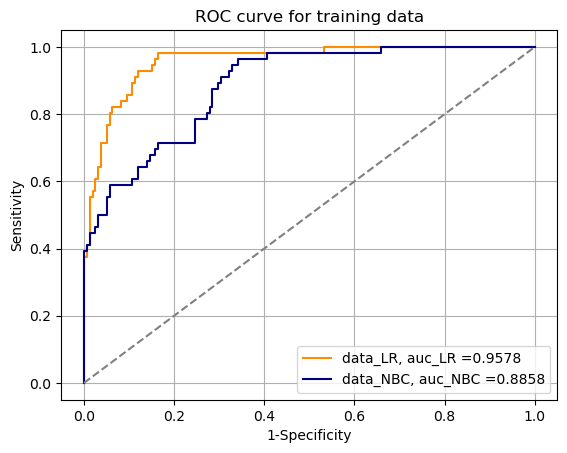

In [98]:
Y_pred_proba_LR = logreg.predict_proba(X_train)[::,1]
Y_pred_proba_NBC = gnb.predict_proba(X_train)[::,1]

fpr, tpr, _ = metrics.roc_curve(Y_train, Y_pred_proba_LR)
fpr_1, tpr_1, _ = metrics.roc_curve(Y_train,  Y_pred_proba_NBC)
auc_LR = metrics.roc_auc_score(Y_train, Y_pred_proba_LR)
auc_NBC = metrics.roc_auc_score(Y_train, Y_pred_proba_NBC)
plt.plot(fpr,tpr, color='darkorange',label="data_LR, auc_LR ="+str(round(auc_LR,4)))
plt.plot(fpr_1,tpr_1, color='navy',label="data_NBC, auc_NBC ="+str(round(auc_NBC,4)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for training data')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

<h3> <center> <font color='red'> Comparision of ROC curve for LR and NBC for testing data </h3>

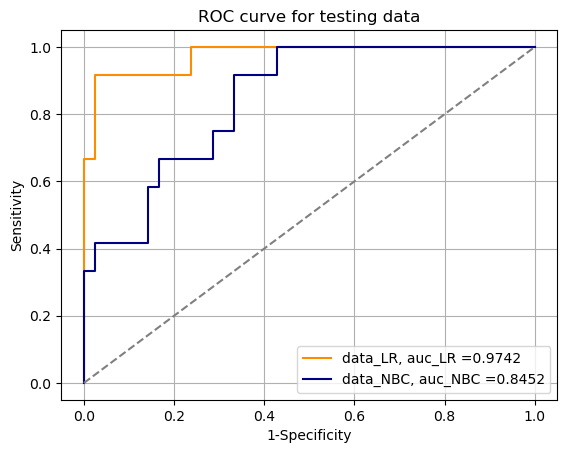

In [99]:
Y_pred_proba_LR1 = logreg.predict_proba(X_test)[::,1]
Y_pred_proba_NBC1 = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba_LR1)
fpr_1, tpr_1, _ = metrics.roc_curve(Y_test,  Y_pred_proba_NBC1)
auc_LR = metrics.roc_auc_score(Y_test, Y_pred_proba_LR1)
auc_NBC = metrics.roc_auc_score(Y_test, Y_pred_proba_NBC1)
plt.plot(fpr,tpr, color='darkorange',label="data_LR, auc_LR ="+str(round(auc_LR,4)))
plt.plot(fpr_1,tpr_1, color='navy',label="data_NBC, auc_NBC ="+str(round(auc_NBC,4)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for testing data')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()

<h3> <center> <font color='red'> Comparision of Confusion matrix for LR and NBC for training data </h3>

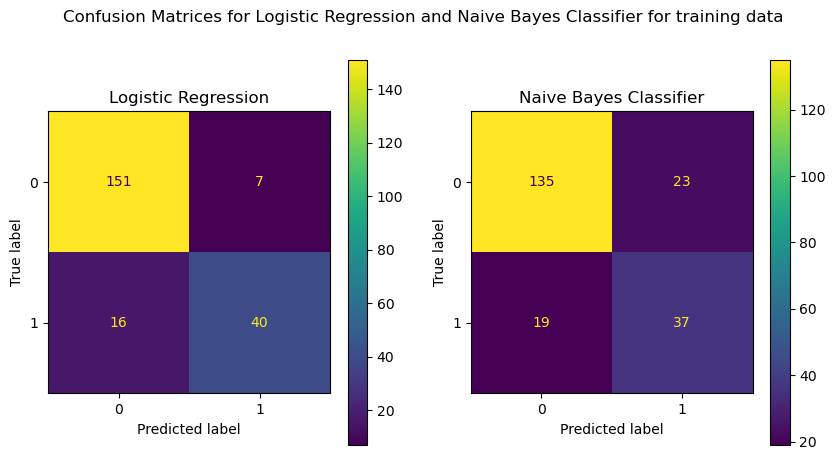

In [100]:
cnf_matrix_LR = metrics.confusion_matrix(Y_train, Y_pred) # Calculate confusion matrix for the LR model
cnf_matrix_NBC = metrics.confusion_matrix(Y_train, Y_pred2) # Calculate confusion matrix for the NBC model

fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # create subplots with 1 row and 2 columns

disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_LR)
disp1.plot(ax=axs[0]) # plot the first confusion matrix on the first subplot
axs[0].set_title('Logistic Regression') # set title for the first subplot

disp2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_NBC)
disp2.plot(ax=axs[1]) # plot the second confusion matrix on the second subplot
axs[1].set_title('Naive Bayes Classifier') # set title for the second subplot

plt.suptitle('Confusion Matrices for Logistic Regression and Naive Bayes Classifier for training data') # set suptitle for the entire plot

plt.show() # display the plot


<h3> <center> <font color='red'> Comparision of Confusion matrix for LR and NBC for testing data </h3>

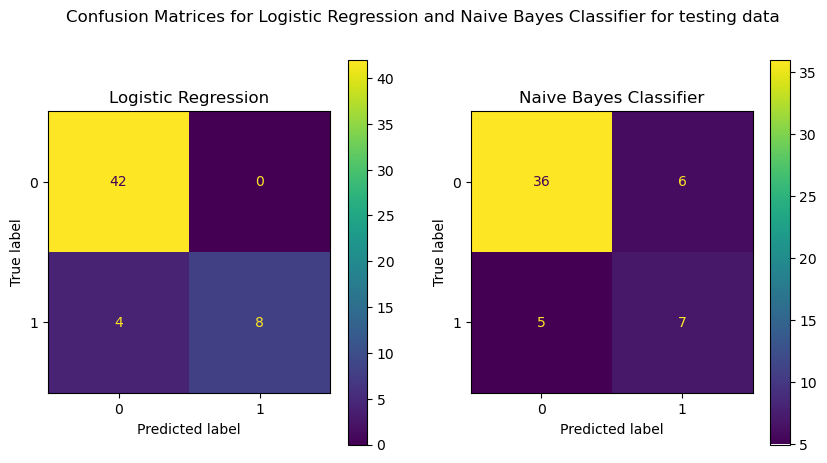

In [101]:
cnf_matrix_LR1 = metrics.confusion_matrix(Y_test, Y_pred1) # Calculate confusion matrix for the LR model
cnf_matrix_NBC1 = metrics.confusion_matrix(Y_test, Y_pred3) # Calculate confusion matrix for the NBC model

fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # create subplots with 1 row and 2 columns

disp3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_LR1)
disp3.plot(ax=axs[0]) # plot the first confusion matrix on the first subplot
axs[0].set_title('Logistic Regression') # set title for the first subplot

disp4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_NBC1)
disp4.plot(ax=axs[1]) # plot the second confusion matrix on the second subplot
axs[1].set_title('Naive Bayes Classifier') # set title for the second subplot

plt.suptitle('Confusion Matrices for Logistic Regression and Naive Bayes Classifier for testing data') # set suptitle for the entire plot

plt.show() # display the plot

In [110]:
#predict the y variable for all x variables
Y_proba_LR = logreg.predict_proba(X)[::,1]

In [108]:
df_prob = pd.DataFrame(Y_proba_LR, columns = ['LR_prob_Y'])
df_prob1 = pd.concat([a, df_prob], axis=1)
df_prob1.to_csv('Y_prob_LR.csv')

In [109]:
Y_proba_NBC = gnb.predict_proba(X)[::,1]
df_prob2 = pd.DataFrame(Y_proba_NBC, columns = ['NBC_prob_Y'])
df_prob3 = pd.concat([a, df_prob2], axis=1)
df_prob3.to_csv('Y_prob_NBC.csv')